In [14]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [15]:
# Setup data
data = pd.read_csv(f"../generated/benchmark.csv", sep=',')
data = data.groupby(['directory', 'type']).agg({'duration': 'median', 'actions': 'first'}).reset_index()
# we don't need the values `added,deleted,unchanged,updated,moved_unchanged,moved_updated`

# Actions

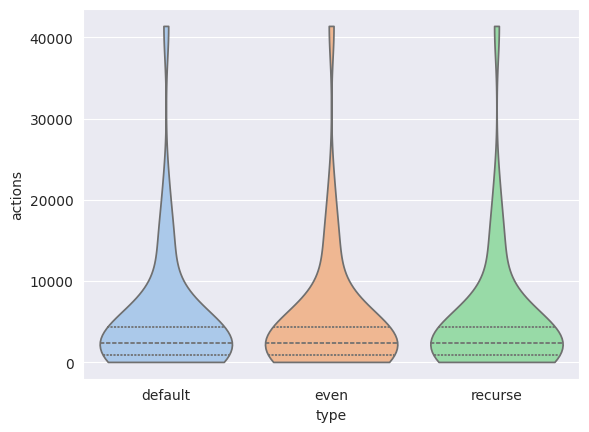

In [16]:
sns.violinplot(data=data, x="type", hue="type", y="actions", palette="pastel", cut=0, inner="quartile")
plt.show()

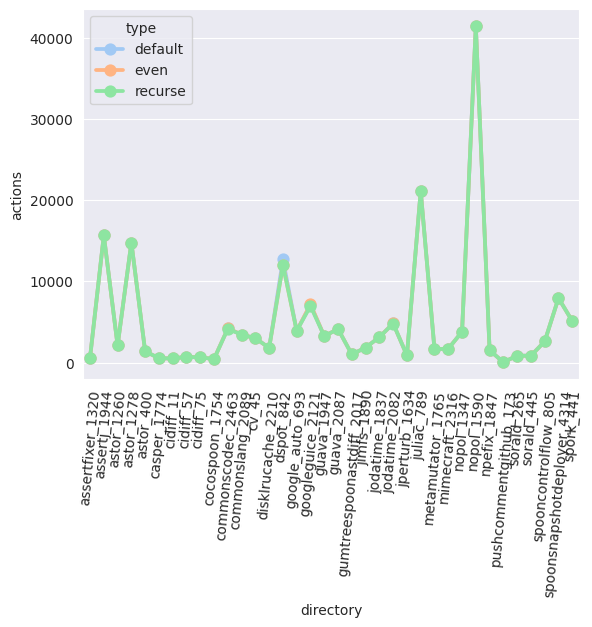

In [17]:
sns.pointplot(data=data, x="directory", hue="type", y="actions", palette="pastel")
plt.xticks(rotation=85)
plt.show()

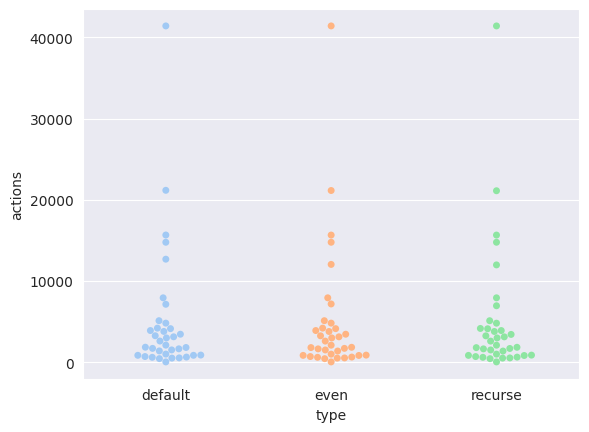

In [18]:
sns.swarmplot(data=data, x="type", hue="type", y="actions", palette="pastel")
plt.show()

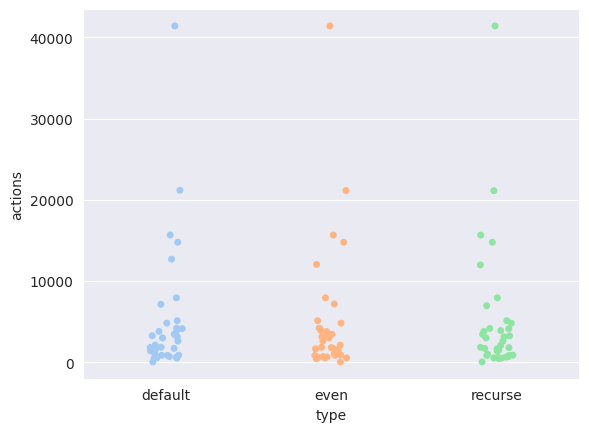

In [19]:
sns.stripplot(data=data, x="type", hue="type", y="actions", palette="pastel")
plt.show()

# Durations

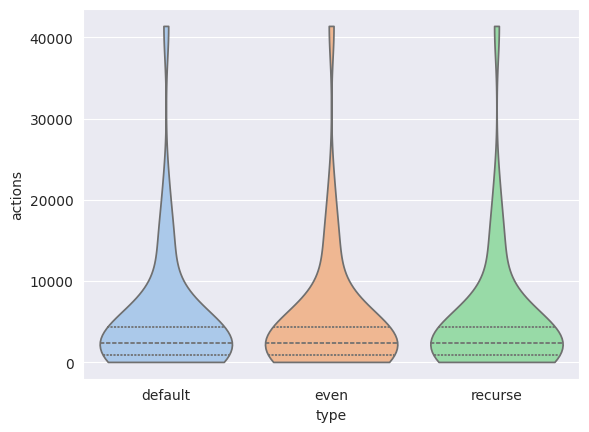

In [20]:
sns.violinplot(data=data, x="type", hue="type", y="actions", palette="pastel", cut=0, inner="quartile")
plt.show()

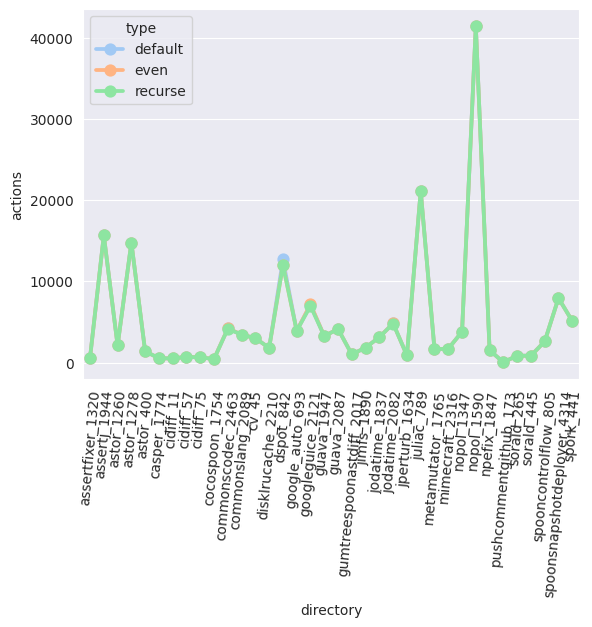

In [21]:
sns.pointplot(data=data, x="directory", hue="type", y="actions", palette="pastel")
plt.xticks(rotation=85)
plt.show()

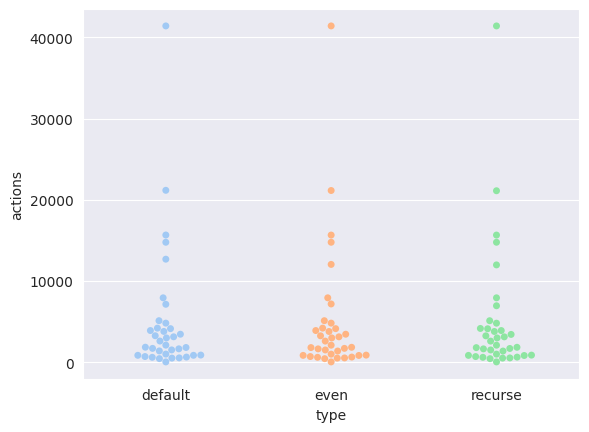

In [22]:
sns.swarmplot(data=data, x="type", hue="type", y="actions", palette="pastel")
plt.show()

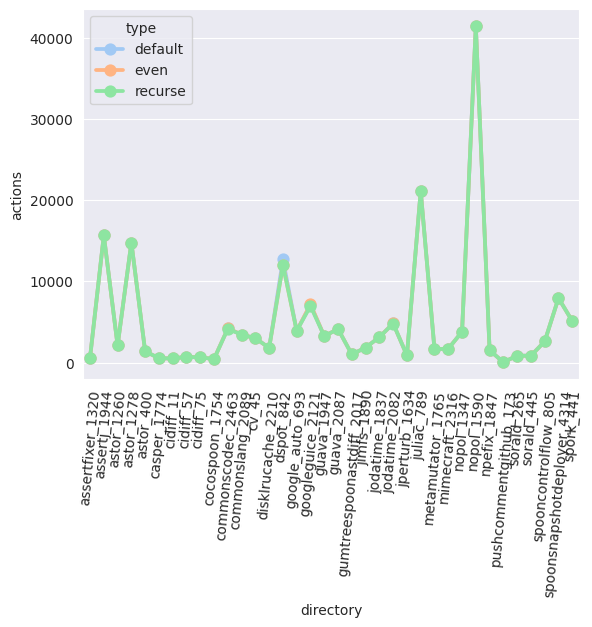

In [23]:
sns.pointplot(data=data, x="directory", hue="type", y="actions", palette="pastel")
plt.xticks(rotation=85)
plt.show()